<a href="https://colab.research.google.com/github/vaibhavt147/Data-Compression-and-Visualization/blob/master/Data_Compression_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Import Libraries

Importing all of the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib

from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import metrics

### 2. Importing and Preprocessing the Iris Dataset

Due to it's common usage for pattern recognition tasks, the iris dataset is available directly through scikit-learn.  Furthermore, we will construct a Pandas DataFrame that provides descriptive statistics for the data set, as well as interesting visualizations such as a scatter matrix. 

In [2]:
# Load Dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

# generate Pandas DataFrame
df = pd.DataFrame(features)
df.columns = iris.feature_names

In [3]:
# print target and target names
print (target)
iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# print data set information
print (df.shape)
print (df.head(20))

(150, 4)
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6         

In [5]:
# print data set descriptions and class distributions
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


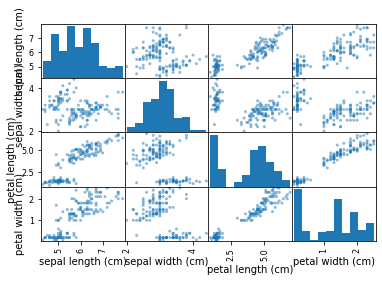

In [6]:
# display scatter plot matrix
scatter_matrix(df)
plt.show()

### 3. The Elbow Method

In unsupervised learning, we don't always know the number of classes or clusters present in the dataset. For this task, the elbow method is commonly used to determine the appropriate number of clusters for a dataset.  Let's use this method to confirm that three clusters is indeed the optimal value for this dataset. 

In [7]:
# empty x and y data lists
X = []
Y = []

for i in range(1,31):
    # initialize and fit the kmeans model 
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    
    # append number of clusters to x data list
    X.append(i)
    
    # append average within-cluster sum of squares to y data list
    awcss = kmeans.inertia_ / df.shape[0]
    Y.append(awcss)

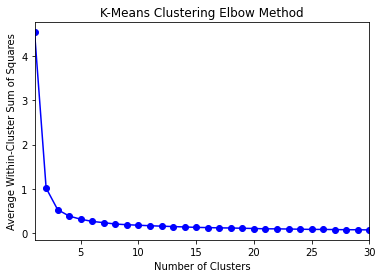

In [8]:
# plot the x and y data
plt.plot(X,Y, 'bo-')
plt.xlim((1, 30))
plt.xlabel('Number of Clusters')
plt.ylabel('Average Within-Cluster Sum of Squares')
plt.title('K-Means Clustering Elbow Method')

# display the plot
plt.show()

### 4. Principle Component Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

Not going into the detailed algebra of PCA, we directly import PCA algorithm provided by sklearn. In the cell below, we will perform a PCA reduction to reduce the number of features in our dataset to two. As a result of this reduction, we will be able to visualize each instance as an X,Y data point.

In [9]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

# perform principle component analysis
pca = PCA(n_components=2)
pc = pca.fit_transform(df)

# print new dimensions
print (pc.shape)
print (pc[:10])

(150, 2)
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]]


In [10]:
# re-fit kmeans model to principle components with appropriate number of clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 5. Visualization of PCA-reduced Data

Now that our data has been compressed, we can easily visualize it using matplotlib.pyplot. Furthermore, since our data has only two components, we can predict the appropriate cluster for each X, Y point in our plot and produce a color-coordinated meshgrid to display the different clusters in our K means algorithm.

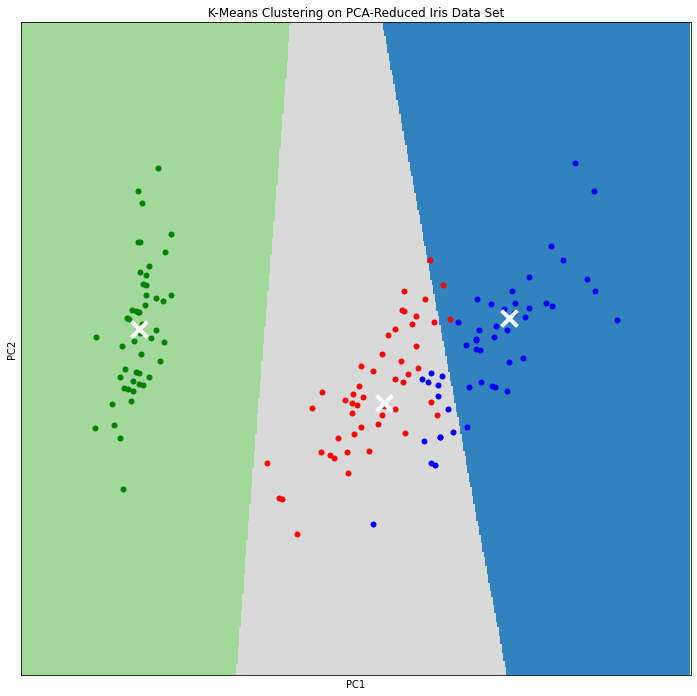

In [11]:
# Visualize high dimensional clusters using principle components

# set size for the mesh
h = 0.02 # determines quality of the mesh [x_min, x_max]x[y_min, y_max]

# generate mesh grid
x_min, x_max = pc[:, 0].min() - 1, pc[:, 0].max() + 1
y_min, y_max = pc[:, 1].min() - 1, pc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# label each point in mesh using last trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# generate color plot from results
Z = Z.reshape(xx.shape)
plt.figure(figsize = (12, 12))
plt.clf()
plt.imshow(Z, interpolation = 'nearest',
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.tab20c,
          aspect = 'auto', origin = 'lower')

# plot the principle components on the color plot
for i, point in enumerate(pc):
    if target[i] == 0:
        plt.plot(point[0], point[1], 'g.', markersize = 10)
    if target[i] == 1:
        plt.plot(point[0], point[1], 'r.', markersize = 10)
    if target[i] == 2:
        plt.plot(point[0], point[1], 'b.', markersize = 10)

# plot the cluster centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s = 250, linewidth = 4,
           color = 'w', zorder = 10)

# set plot title and axis limits
plt.title('K-Means Clustering on PCA-Reduced Iris Data Set')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(())
plt.yticks(())

# display the plot
plt.show()

### 6. Clustering Metrics

To analyse the performance of the PCA reduction, we will use some common clustering metrics, such as homogeneity, completeness, and V-measure. 

* Homogeneity - measures whether or not all of its clusters contain only data points which are members of a single class. 
* Completeness - measures whether or not all members of a given class are elements of the same cluster
* V-measure - the harmonic mean between homogeneity and completeness

In [12]:
# K Means clustering on Non Reduced Data
kmeans1 = KMeans(n_clusters = 3)
kmeans1.fit(features)

# K Means clustering on PCA Reduced Data
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(pc)

# print metrics for Non reduced data 
print('Non Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans1.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans1.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans1.labels_)))

# print metrics for PCA reduced data
print('Reduced Data')
print('Homogeneity: {}'.format(metrics.homogeneity_score(target, kmeans2.labels_)))
print('Completeness: {}'.format(metrics.completeness_score(target, kmeans2.labels_)))
print('V-measure: {}'.format(metrics.v_measure_score(target, kmeans2.labels_)))

Non Reduced Data
Homogeneity: 0.7514854021988338
Completeness: 0.7649861514489815
V-measure: 0.7581756800057784
Reduced Data
Homogeneity: 0.7364192881252849
Completeness: 0.7474865805095324
V-measure: 0.7419116631817836


In [13]:
# to compare results further, print out the actual labels
print (kmeans1.labels_)
print (kmeans2.labels_)
print (target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
